In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().any()

True

In [7]:
data=data.drop_duplicates()


In [8]:
data.shape

(1337, 7)

Health Insurance Cost Prediction Using Machine Learning Questions : 

1. Display Top 5 Rows of The Dataset
2. Check Last 5 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check Null Values In The Dataset
6. Get Overall Statistics About The Dataset
7. Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values
8. Store Feature Matrix In X and Response(Target) In Vector y
9. Train/Test split
          1. Split data into two-part: a training set and a testing set
          2. Train the model(s) on the training set
          3. Test the Model(s) on the Testing set
10. Import the models
11. Model Training
12. Prediction on Test Data
13. Compare Performance Visually 
14. Evaluating the Algorithm
15. Predict Charges For New Customer
16. Save Model Usign Joblib
17. GUI

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
data['sex']=data['sex'].map({'female':0, 'male':1})
data

C:\Users\dell\AppData\Local\Temp\ipykernel_13324\114423280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex']=data['sex'].map({'female':0, 'male':1})


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [14]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['smoker'].unique()

C:\Users\dell\AppData\Local\Temp\ipykernel_13324\84934497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker']=data['smoker'].map({'yes':1,'no':0})


array([1, 0], dtype=int64)

In [15]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data['region']=data['region'].map({
    'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3
})

C:\Users\dell\AppData\Local\Temp\ipykernel_13324\3829427230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region']=data['region'].map({


In [17]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [18]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
data['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1337, dtype: int64

In [20]:
data.groupby('sex')['children'].sum()

sex
0    711
1    754
Name: children, dtype: int64

In [21]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [22]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='region', ylabel='charges'>

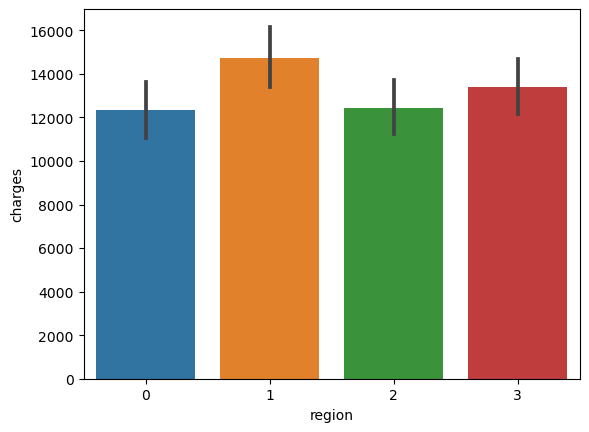

In [23]:
sns.barplot(x='region', y='charges', data=data)

In [24]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='children', ylabel='charges'>

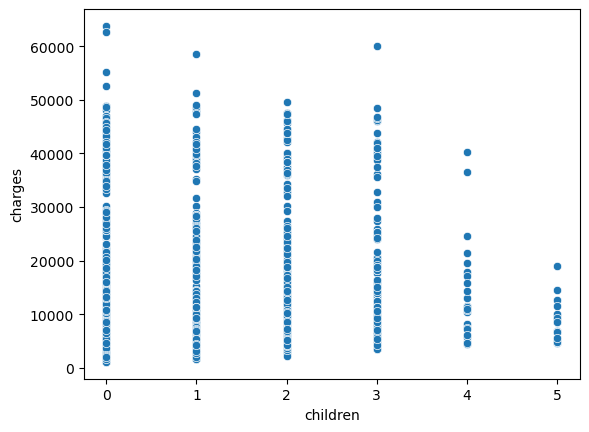

In [25]:
sns.scatterplot(y='charges', x='children', data=data)

In [26]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [28]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# machine learning-
# -supervised learning- label data (input data, output data) contains dependent variable and independent variable
# -unsupervised learning-
# -reinforcement learning

# supervised leraning
# -classification- used in categorical data( like yes or no type)
# -regression- numerical

In [29]:
# convert columns from string['sex', 'smoker', 'region'] to numerical values
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


# store feature matrix in x and response [target] in vector y

In [31]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
# lets start independet variable


In [33]:
X=data.drop(['charges'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [34]:
Y=data['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

# train/ test split
-split data into two parts
-training set and testing set
-trained the model(s) on the training set
- test the model(s) on the testing set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [37]:
X_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,3
968,21,1,25.745,2,0,3
599,52,0,37.525,2,0,2
170,63,1,41.470,0,0,1
275,47,0,26.600,2,0,3
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,3
1131,27,1,45.900,2,0,0
1295,20,1,22.000,1,0,0
861,38,0,28.000,3,0,0


In [38]:
X_test

,age,sex,bmi,children,smoker,region
900,49,1,22.515,0,0,3
1064,29,0,25.600,4,0,0
1256,51,0,36.385,3,0,2
298,31,1,34.390,3,1,2
237,31,1,38.390,2,0,1
...,...,...,...,...,...,...
534,64,1,40.480,0,0,1
542,63,0,36.300,0,0,1
760,22,0,34.580,2,0,3
1284,61,1,36.300,1,1,0


In [39]:
Y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [40]:
Y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

# import model
supervised learning- regression- for numerical data

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# train model

In [42]:
#linear
lr=LinearRegression()
# fit laa training data lai pathauxa
lr.fit(X_train, Y_train)
#svm
svm=SVR()
svm.fit(X_train, Y_train)
# randomforest
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
# gradient boositng
gr=GradientBoostingRegressor()
gr.fit(X_train, Y_train)

GradientBoostingRegressor()

# prediction on Test data

In [43]:
# Linear
Y_pred1=lr.predict(X_test)
#svm
Y_pred2=svm.predict(X_test)
#fr
Y_pred3=rf.predict(X_test)
#gr
Y_pred4=gr.predict(X_test)



In [44]:
df1=pd.DataFrame({'Actual':Y_test,'Lr':Y_pred1,'SVM':Y_pred2,'RF':Y_pred3,'GR':Y_pred4})
df1

,Actual,Lr,SVM,RF,GR
900,8688.85885,8080.450186,9285.139795,9984.796337,10503.526620
1064,5708.86700,5592.871120,9161.150970,5754.619272,7231.162694
1256,11436.73815,14378.298655,9303.979540,13120.664043,13518.524149
298,38746.35510,31731.819541,9174.366057,44070.228675,38985.408853
237,4463.20510,9158.356944,9177.179203,5402.298453,6291.919618
...,...,...,...,...,...
534,13831.11520,16952.682449,9363.674648,14169.536846,13890.363202
542,13887.20400,15496.907965,9363.031188,14736.968300,14407.858079
760,3925.75820,6303.385531,9135.130785,13152.619743,7447.372254
1284,47403.88000,38248.332909,9355.706074,47575.412753,49312.338846


# Compare Performance Visually

In [45]:
import matplotlib.pyplot as plt


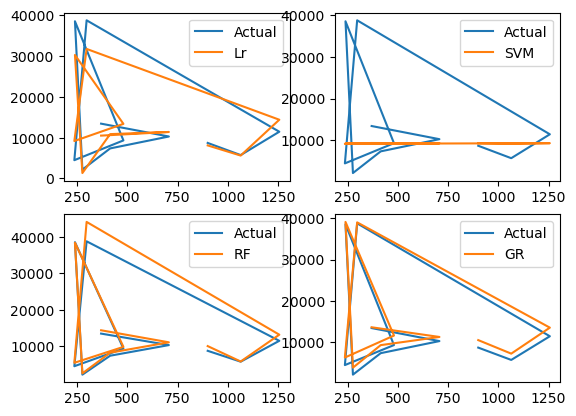

In [46]:
#lr
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

#svm             
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()
  
#rf             
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RF'].iloc[0:11],label='RF')
plt.legend()

#gr             
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GR'].iloc[0:11],label='GR')
plt.legend()
                          
# svm is mostly used in deeplearning

# GradientBoostingRegressor is best model for this dataset

# Evaluate the Algorithm

In [47]:
from sklearn import metrics

In [48]:
#lr
score1=metrics.r2_score(Y_test,Y_pred1)
#svm
score2=metrics.r2_score(Y_test,Y_pred2)
#rf
score3=metrics.r2_score(Y_test,Y_pred3)
#gf
score4=metrics.r2_score(Y_test,Y_pred4)

# r2 ko score jahila -1 to 1 garxa
# it measure cofiicent of determinant

In [49]:
print(score1, score2, score3, score4)

0.806846632262911 -0.1344462622675453 0.8810387838053397 0.9006512819768809


In [50]:
# errors
# lr
mse1=metrics.mean_squared_error(Y_test, Y_pred1)
#svm
mse2=metrics.mean_squared_error(Y_test, Y_pred2)
#rf
mse3=metrics.mean_squared_error(Y_test, Y_pred3)
#gr
mse4=metrics.mean_squared_error(Y_test, Y_pred4)

In [51]:
print(mse1, mse2, mse3, mse4)

35493102.61165055 208461380.02042088 21859844.86147307 18255929.39145739


In [52]:
# absolute error
s1=metrics.mean_absolute_error(Y_test, Y_pred1)
#svm
s2=metrics.mean_absolute_error(Y_test, Y_pred2)
#rf
s3=metrics.mean_absolute_error(Y_test, Y_pred3)
#gr
s4=metrics.mean_absolute_error(Y_test, Y_pred4)

In [53]:
print(s1, s2, s3, s4)

4182.3531552883 9249.886802156661 2540.9248782929094 2518.344331422497


# junko error kaam hunxa tai choose garni

# prdeict charges for new customer

In [54]:
df={'age':40,'sex':1,'bmi':40.34,'children':4,'smoker':1,'region':1}
data_new=pd.DataFrame(df, index=[0])
data_new

,age,sex,bmi,children,smoker,region
0,40,1,40.34,4,1,1


In [55]:
new_pred=gr.predict

In [56]:
# save model using joblib
gr=GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [57]:
import joblib

In [58]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [59]:
model=joblib.load('model_joblib_gr')

In [60]:
model.predict(data_new)

array([42353.55597392])

# GUI

In [61]:
from tkinter import *

In [63]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result= model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text='Insurance cost:').grid(row=8)
    Label(master,text=result).grid(row=9)

master= Tk()
master.title('Insurance Cost prediction')
label = Label(master,text='Insurance Cost Prediction',bg='black',fg='white').grid()

Label(master,text='Enter Your Age:').grid(row=1)
Label(master,text='Male or Female [1/0]:').grid(row=2)
Label(master,text='Enter your BMI value:').grid(row=3)
Label(master,text='Enter number of children:').grid(row=4)
Label(master,text='smoker or nonsmoker [0/1]:').grid(row=5)
Label(master,text='Region [0-3]:').grid(row=6)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master, text='Predict',command=show_entry).grid()
mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
